In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [58]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axis import Axis 
from matplotlib.pyplot import figure

**My model**

In [211]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=1.5)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=1.2)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.005)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.015)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1000)
    z_plus = gillespy2.Species(name='z_plus', initial_value=100)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=8.0, num_points=81)
    model.timespan(tspan)
    return model

In [212]:
switching_model = switching_process()

In [213]:
%time switching_results = switching_model.run(number_of_trajectories=20)

CPU times: user 11.6 ms, sys: 16.1 ms, total: 27.7 ms
Wall time: 6min 58s


In [214]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()


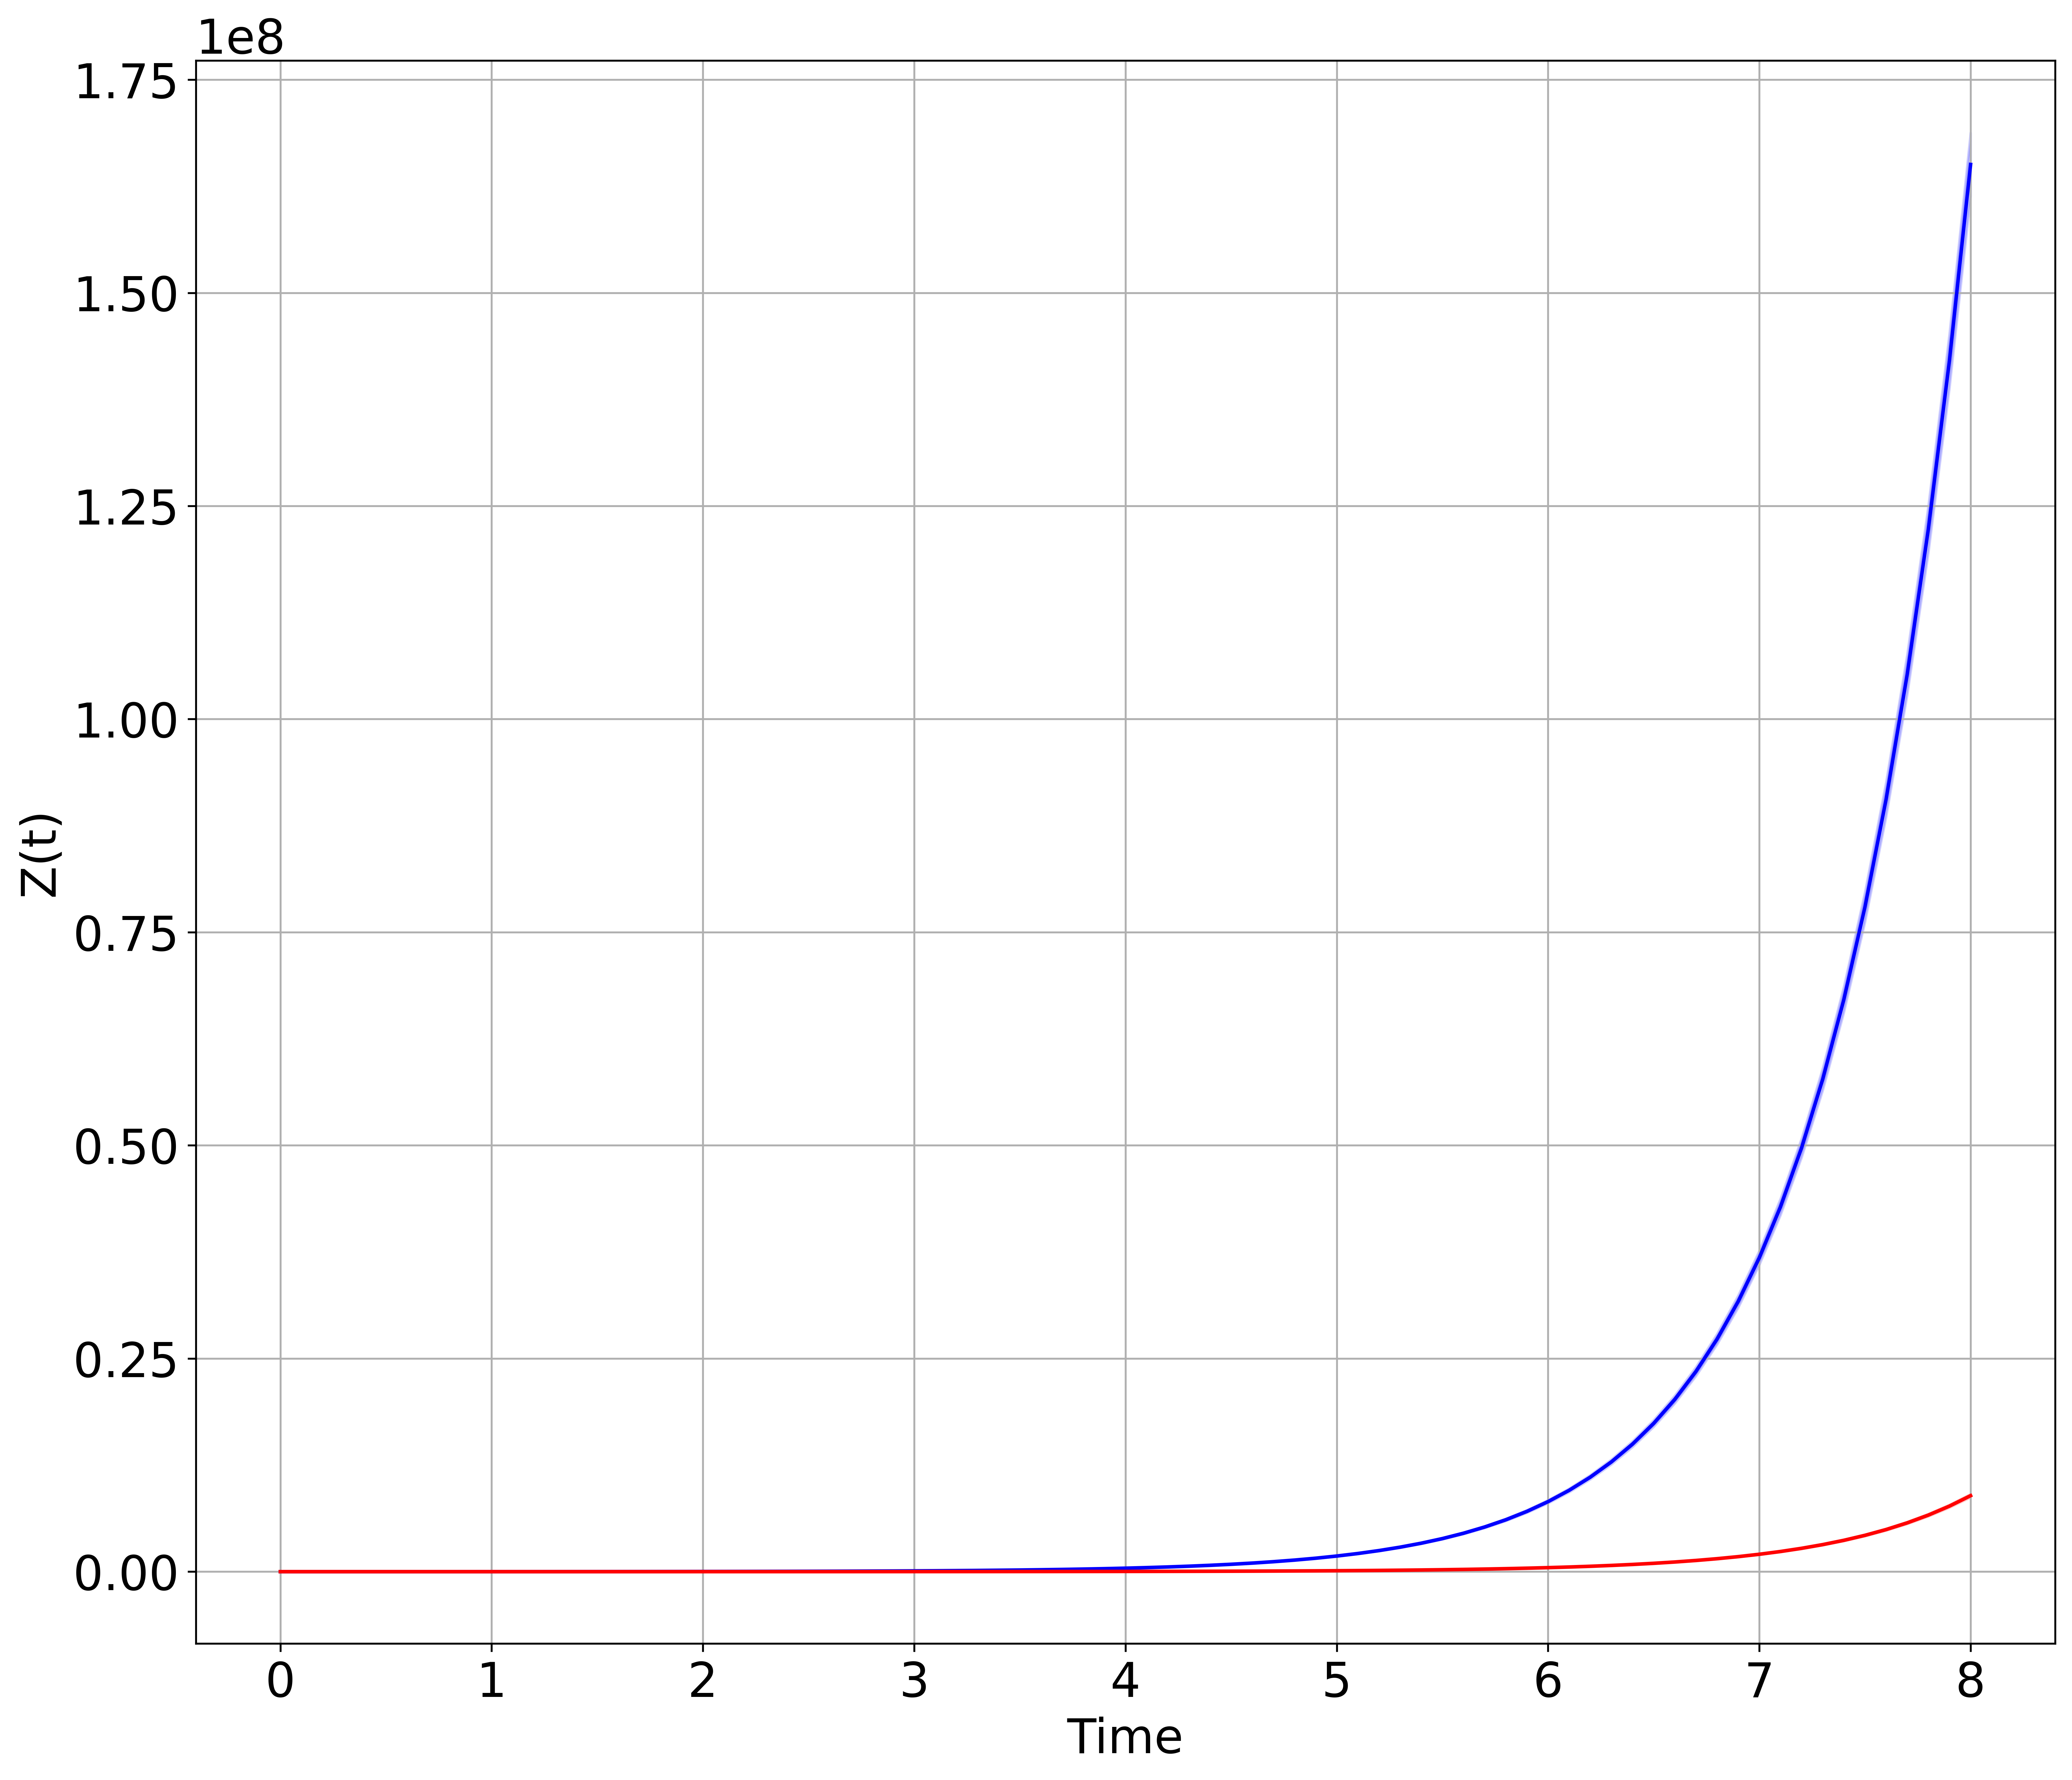

In [215]:
#figure(figsize=(14, 12), dpi=600)
fig,ax = plt.subplots(figsize=(14, 12), dpi=600)
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue', label = 'z_minus')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red', label = 'z_plus')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)
#plt.title('Z(t) - 1.5_1.2_0.015_0.005', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)
plt.tick_params(labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Z(t)', fontsize=20)
#plt.legend(fontsize=16)
plt.grid()

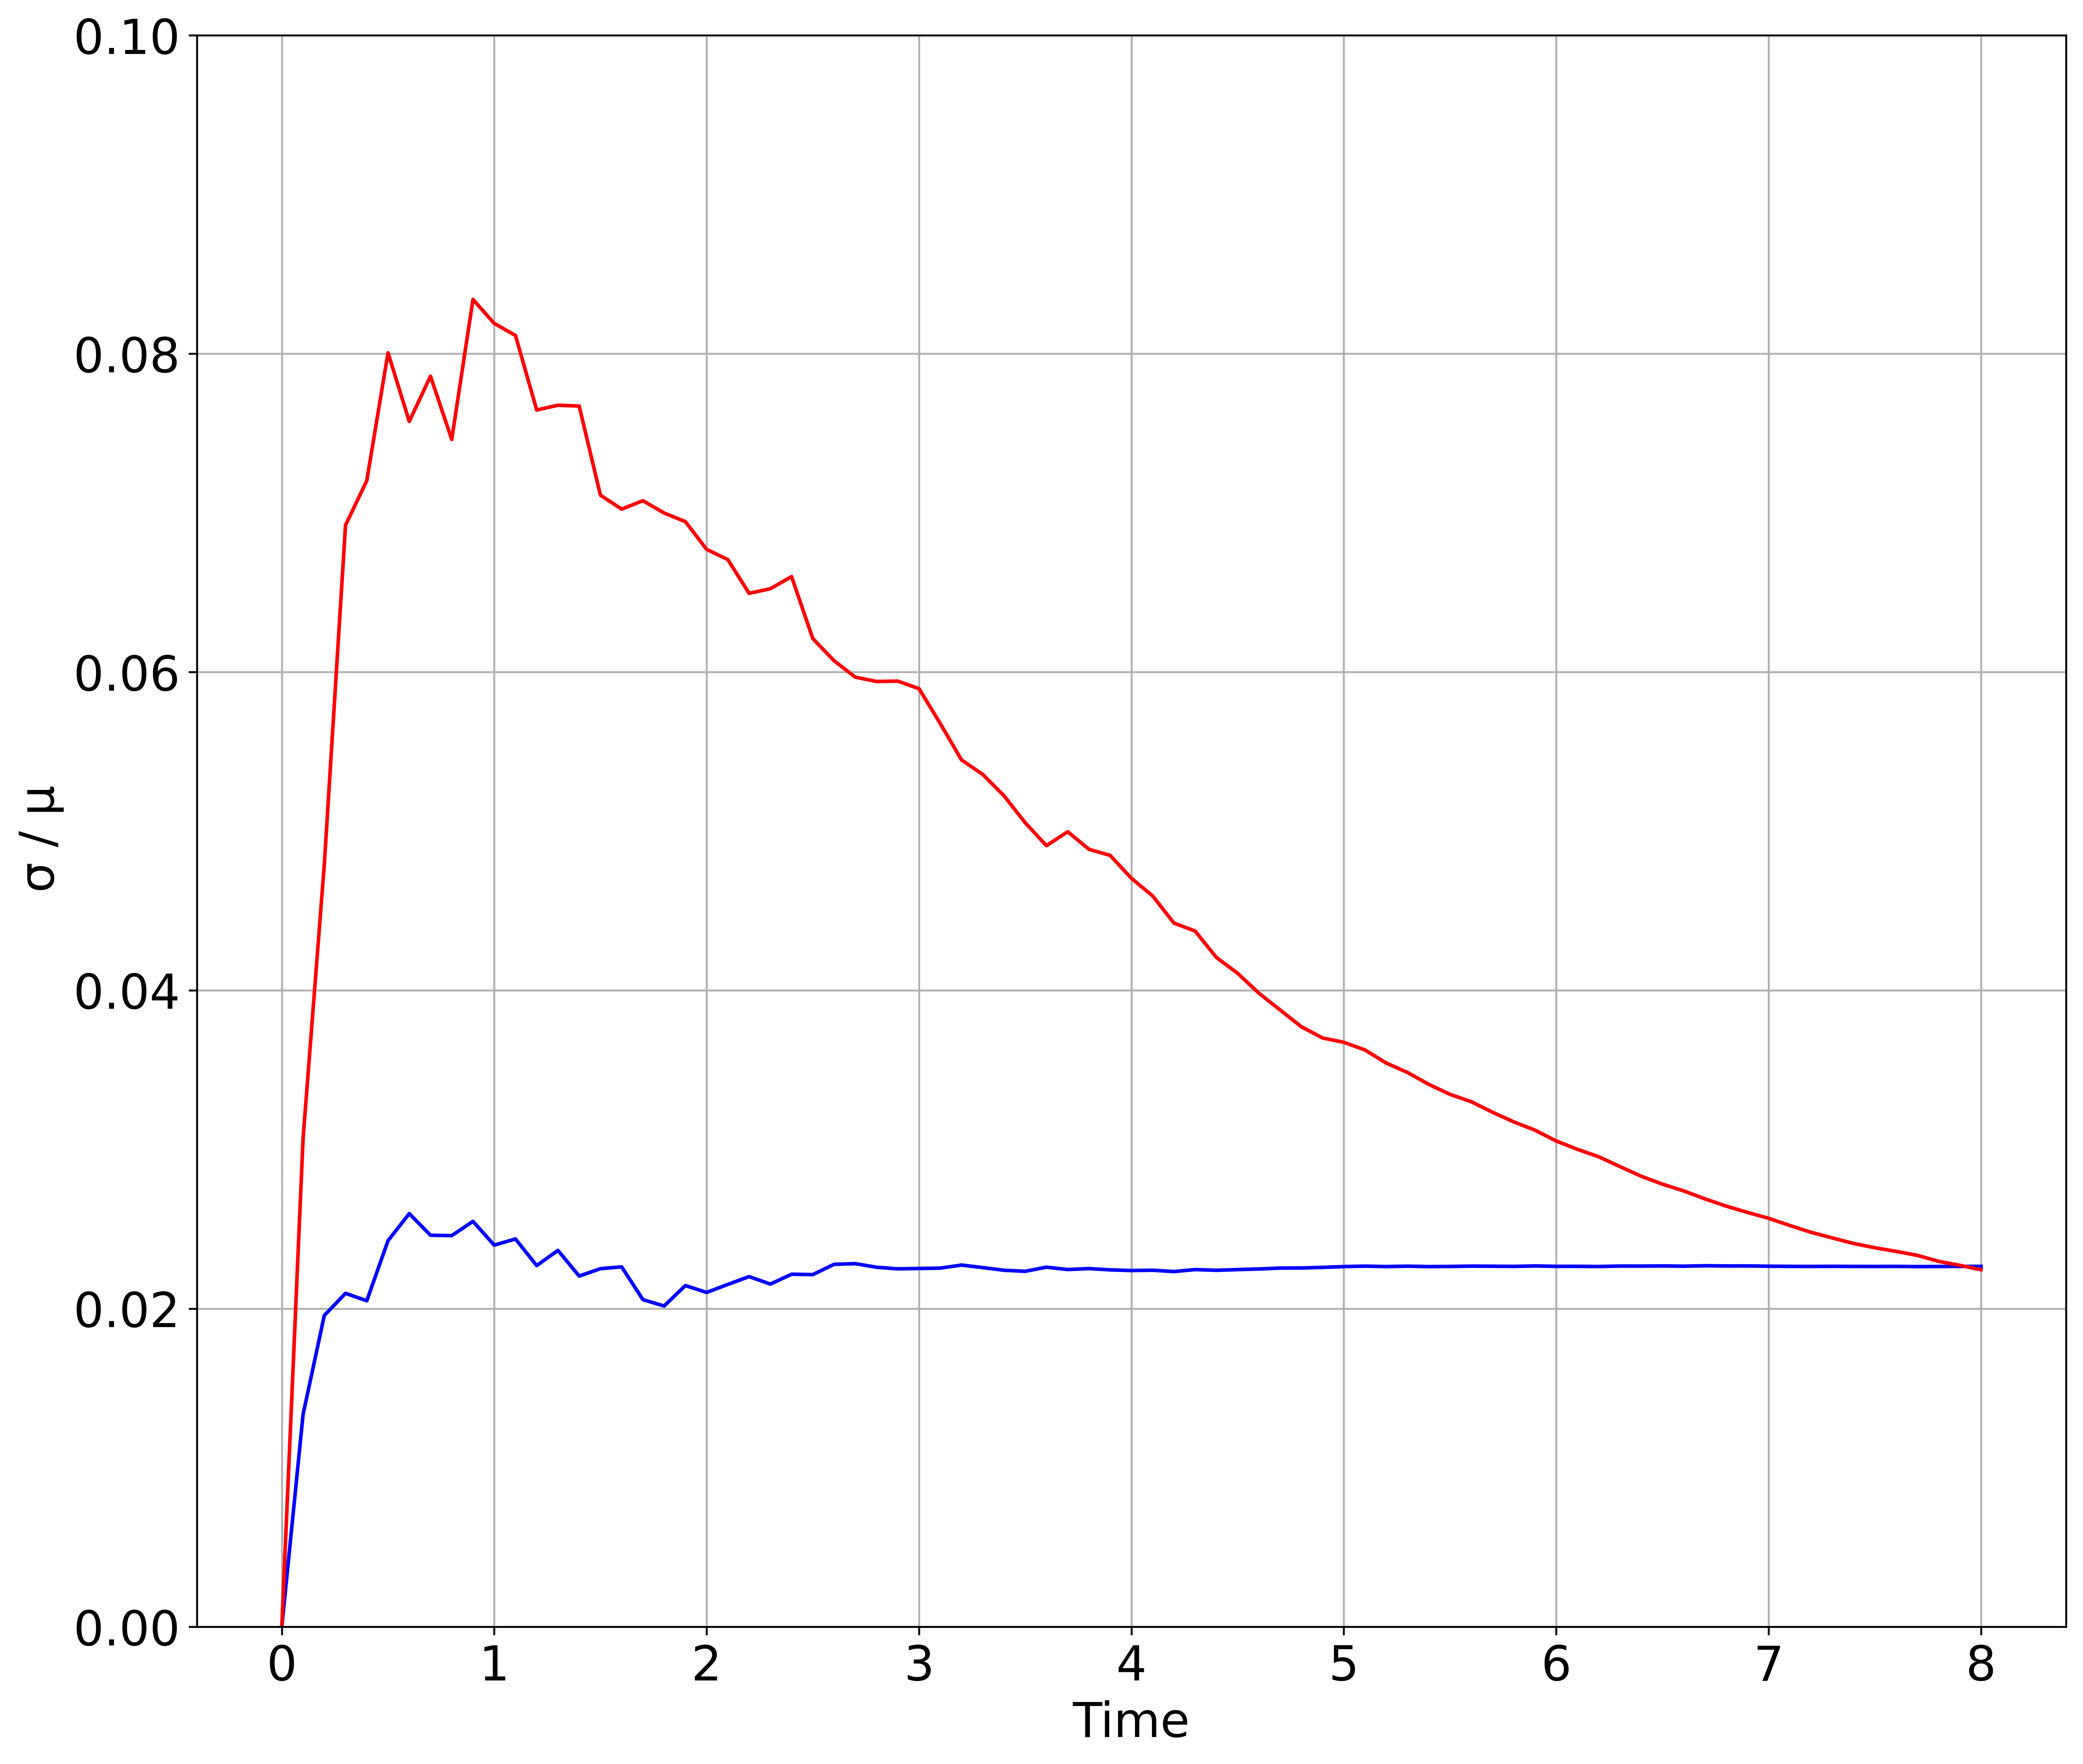

In [216]:
figure(figsize=(14, 12), dpi=600)
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue', label = 'z_minus')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red', label = 'z_plus')
#plt.title('stddev/avg - 1.5_1.2_0.001_0.01')
plt.tick_params(labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylim(0, 0.1)
plt.ylabel(u'\u03c3 / \u03bc ', fontsize=20)
#plt.legend()
plt.grid()

In [175]:
for i in range(0,20):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    df.to_csv('./Gillespy2/1.2_1.5_0.01_0.001_8t_81p/simulations/switching_results_{}.csv'.format(i))

In [176]:
df_avg = pd.DataFrame(results_avg.to_array()[0], columns=['time', 'z_minus', 'z_plus'])

In [177]:
df_avg.to_csv('./Gillespy2/1.2_1.5_0.01_0.001_8t_81p/simulations/switching_results_avg.csv')

In [ ]:
switching_results.plot()

In [ ]:
results_avg['z_minus'][-1], results_stddev['z_minus'][-1]

In [ ]:
print(results_stddev['z_minus'][-1] / results_avg['z_minus'][-1])
print(results_stddev['z_plus'][-1] / results_avg['z_plus'][-1])

# print(results_stddev1['z_minus'][-1] / results_avg1['z_minus'][-1])
# print(results_stddev1['z_plus'][-1] / results_avg1['z_plus'][-1])

# print(results_stddev2['z_minus'][-1] / results_avg2['z_minus'][-1])
# print(results_stddev2['z_plus'][-1] / results_avg2['z_plus'][-1])

In [ ]:
np.exp(.5 * 4),np.sqrt(np.exp(.5 * 4) * (np.exp(.5 * 4) - 1))

In [ ]:
plt.plot(results_avg['time'][30:],results_avg['z_minus'][30:], '-', color = 'blue',label = '0.005_0.015')
#plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'blue', label = '0.005_0.015')
plt.fill_between(results_avg['time'][30:], np.array(results_avg['z_minus'][30:]) - np.array(results_stddev['z_minus'][30:]), np.array(results_avg['z_minus'][30:]) + np.array(results_stddev['z_minus'][30:]), color = 'blue', alpha = 0.2)
#plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'blue', alpha = 0.2)

plt.plot(results_avg1['time'][30:],results_avg1['z_minus'][30:], '-', color = 'red',label = '0.01_0.01')
#plt.plot(results_avg1['time'],results_avg1['z_plus'], '-', color = 'red', label = '0.01_0.01')
plt.fill_between(results_avg1['time'][30:], np.array(results_avg1['z_minus'][30:]) - np.array(results_stddev1['z_minus'][30:]), np.array(results_avg1['z_minus'][30:]) + np.array(results_stddev1['z_minus'][30:]), color = 'red', alpha = 0.2)
#plt.fill_between(results_avg1['time'], np.array(results_avg1['z_plus']) - np.array(results_stddev1['z_plus']), np.array(results_avg1['z_plus']) + np.array(results_stddev1['z_plus']), color = 'red', alpha = 0.2)

#plt.plot(results_avg2['time'][30:],results_avg2['z_minus'][30:], '-', color = 'green')
#plt.plot(results_avg2['time'],results_avg2['z_plus'], '-', color = 'green')
#plt.fill_between(results_avg2['time'][30:], np.array(results_avg2['z_minus'][30:]) - np.array(results_stddev2['z_minus'][30:]), np.array(results_avg2['z_minus'][30:]) + np.array(results_stddev2['z_minus'][30:]), color = 'green', alpha = 0.2)
#plt.fill_between(results_avg2['time'], np.array(results_avg2['z_plus']) - np.array(results_stddev2['z_plus']), np.array(results_avg2['z_plus']) + np.array(results_stddev2['z_plus']), color = 'green', alpha = 0.2)

plt.title('Z-(t)')
plt.legend()

In [ ]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

In [ ]:
results_avg.plot()

In [ ]:
switching_results[0]

In [ ]:
results_avg.to_array()

In [ ]:
fig,axs = plt.subplots(1,5, figsize=(15,4))
for i in range(0,5):
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_minus'], 'r')
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_plus'], 'b')
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [ ]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        #axs[j,i].set_ylim(0,2e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 